<a href="https://colab.research.google.com/github/SNOOthiking/shopping2/blob/master/%08XGBoost_final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dacon 쇼핑몰 매출액 예측하기 
- 추측
> 1. 각 스토어별로 모델을 적용해야 더 정확할 것이다.
> 2. XGBoost 기법을 써보자

In [ ]:
import pandas as pd 

## 드라이브 마운트 (코랩 사용)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/dacon_shopping2/shopping2_git/dataset/train.csv')
test =pd.read_csv('/content/drive/MyDrive/dacon_shopping2/shopping2_git/dataset/test.csv')

In [ ]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [ ]:
train = train.fillna(0)
test = test.fillna(0)

In [ ]:
test

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,05/10/2012,68.55,3.617,8077.89,0.00,18.22,3617.43,3626.14,6.573,False
1,2,1,12/10/2012,62.99,3.601,2086.18,0.00,8.11,602.36,5926.45,6.573,False
2,3,1,19/10/2012,67.97,3.594,950.33,0.00,4.93,80.25,2312.85,6.573,False
3,4,1,26/10/2012,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False
4,5,2,05/10/2012,70.27,3.617,6037.76,0.00,10.04,3027.37,3853.40,6.170,False
...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,26/10/2012,46.97,3.755,38.65,2.61,0.98,0.00,457.74,5.217,False
176,177,45,05/10/2012,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,8.667,False
177,178,45,12/10/2012,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,8.667,False
178,179,45,19/10/2012,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,8.667,False


In [ ]:
train['Date'] = pd.to_datetime(train['Date'],format='%d/%m/%Y')
test['Date']=pd.to_datetime(test['Date'],format='%d/%m/%Y')

In [ ]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90
1,2,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44
2,3,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17
3,4,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59
4,5,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,2012-08-31,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,2012-09-07,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,2012-09-14,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,2012-09-21,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for Store in range(1,len(train['Store'].unique())+1):
    scale =MinMaxScaler()
    X_train_sc = train[train['Store']==Store][['Temperature','Fuel_Price','Unemployment']]
    X_train_Data = train[train['Store']==Store].iloc[:,[1,5,6,7,8,9,11]]
    X_train_Data = X_train_Data.reset_index(level=None,drop=True)
    scale_data = pd.DataFrame(scale.fit_transform(X_train_sc))
    scale_data.columns = ['Temperature','Fuel_Price','Unemployment']
    X_train_Data[['Temperature','Fuel_Price','Unemployment']] = scale_data
    df_train = pd.concat([df_train,X_train_Data],axis=0)

    X_test_sc = test[test['Store']==Store][['Temperature','Fuel_Price','Unemployment']]
    X_test_Data = test[test['Store']==Store].iloc[:,[1,5,6,7,8,9,11]]
    X_test_Data = X_test_Data.reset_index(level=None,drop=True)
    scale_test = pd.DataFrame(scale.transform(X_test_sc))
    scale_test.columns =['Temperature','Fuel_Price','Unemployment'] 
    X_test_Data[['Temperature','Fuel_Price','Unemployment']] = scale_test
    df_test = pd.concat([df_test,X_test_Data])

In [ ]:
df_train = df_train.reset_index(level=None,drop=True)
df_test = df_test.reset_index(level=None,drop=True)

In [ ]:
df_train[['HF','HT']] = pd.get_dummies(df_train['IsHoliday'])

In [ ]:
df_train = df_train.drop('IsHoliday',axis=1)
df_test = df_test.drop('IsHoliday',axis=1)

In [ ]:
df_test[['HF','HT']]=[1,0]

In [ ]:
train['Weekly_Sales']

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6250     734297.87
6251     766512.66
6252     702238.27
6253     723086.20
6254     713173.95
Name: Weekly_Sales, Length: 6255, dtype: float64

In [ ]:
df_train['Weekly_Sales'] = train['Weekly_Sales']

In [ ]:
df_train

,Store,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Temperature,Fuel_Price,Unemployment,HF,HT,Weekly_Sales
0,1,0.00,0.00,0.00,0.00,0.00,0.122844,0.041637,1.000000,1,0,1643690.90
1,1,0.00,0.00,0.00,0.00,0.00,0.055289,0.024408,1.000000,0,1,1641957.44
2,1,0.00,0.00,0.00,0.00,0.00,0.080533,0.000000,1.000000,1,0,1611968.17
3,1,0.00,0.00,0.00,0.00,0.00,0.199644,0.033740,1.000000,1,0,1409727.59
4,1,0.00,0.00,0.00,0.00,0.00,0.197333,0.079684,1.000000,1,0,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...
6250,45,23641.30,6.00,92.93,6988.31,3992.13,0.865965,0.854426,0.457746,1,0,734297.87
6251,45,11024.45,12.80,52.63,1854.77,2055.70,0.876315,0.886613,0.457746,0,1,766512.66
6252,45,11407.95,0.00,4.30,3421.72,5268.92,0.743468,0.913680,0.457746,1,0,702238.27
6253,45,8452.20,92.28,63.24,2376.38,8670.40,0.700204,0.979517,0.457746,1,0,723086.20


In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
import seaborn as sns 

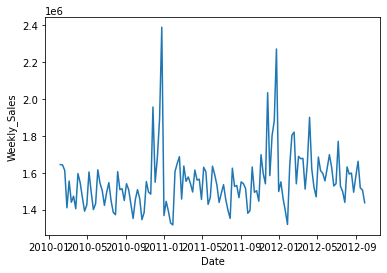

In [ ]:
sns.lineplot(data=df_train[df_train['Store']==1],x=train['Date'],y='Weekly_Sales')

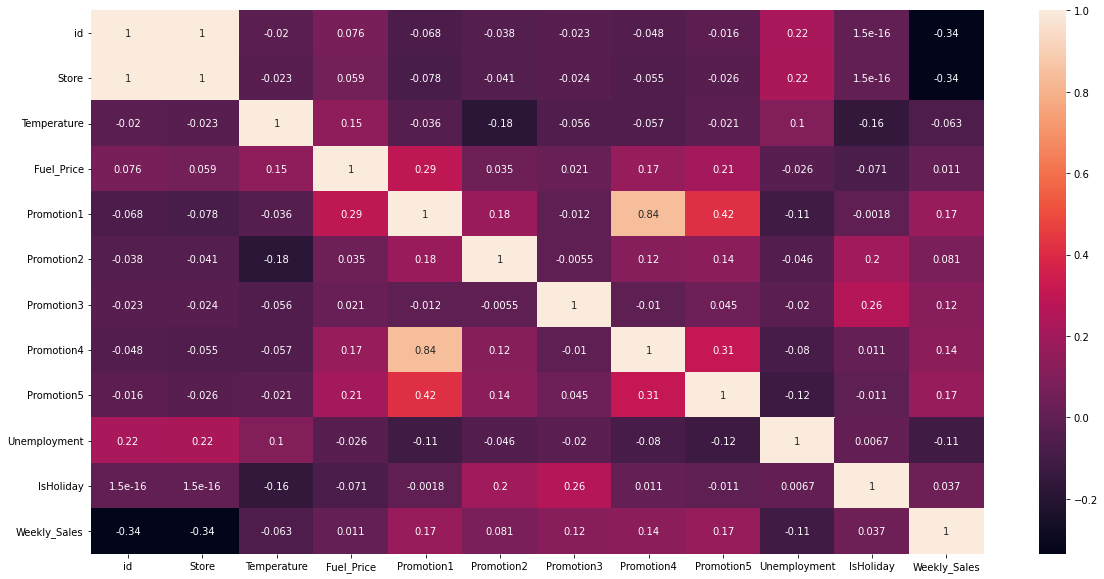

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True)

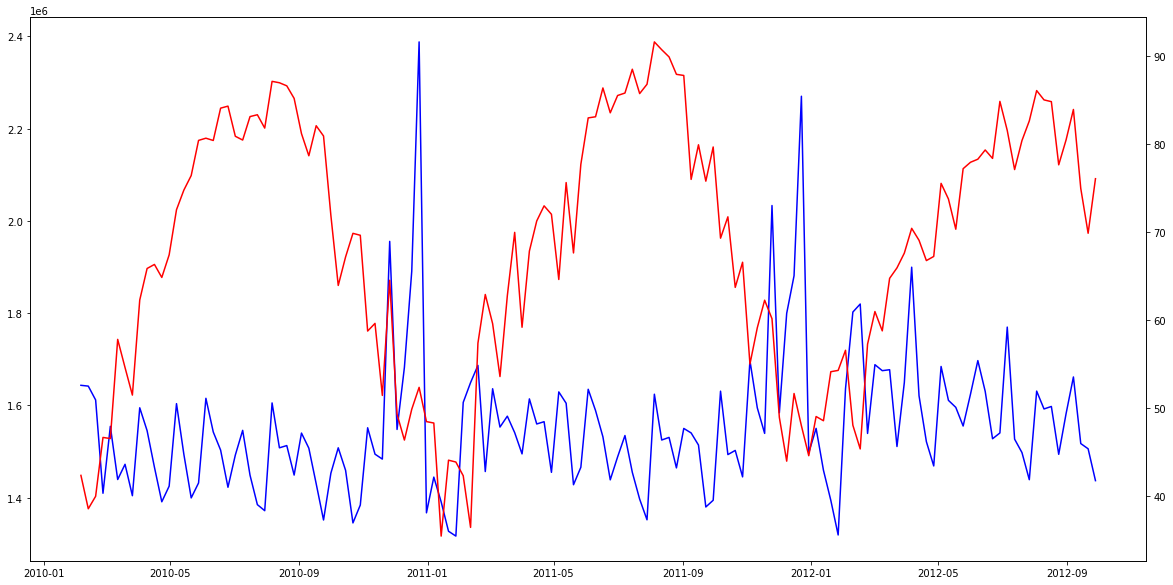

In [ ]:
fig = plt.figure(figsize =(20,10))
ax1 = fig.add_subplot()
ax1.plot(train[train['Store']==1]['Date'],train[train['Store']==1]['Weekly_Sales'],'b')
ax2 = ax1.twinx()
ax2.plot(train[train['Store']==1]['Date'],train[train['Store']==1]['Temperature'],'r')

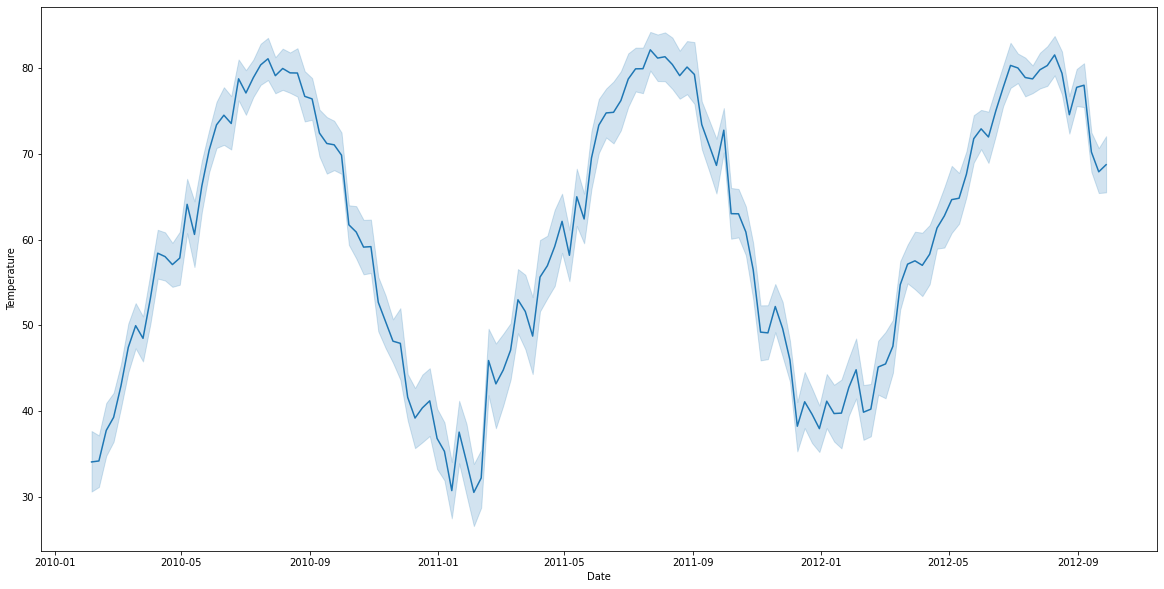

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=train,x='Date',y='Temperature')

# 계절성과 주기가 있는것 같은 시계열 데이터
### 온도가 낮을 때 매출이 증가하는 경향이 있다. 
-  다변량 시계열 분석을 해보면 어떻게 될까? 


In [ ]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_train['Date'] = train['Date']
df_test['Date']= test['Date']

In [ ]:
df_t1 = df_train[df_train['Store']==1]

In [ ]:
df_t1.index = df_t1['Date']

In [ ]:
df_t1= df_t1.drop('Date',axis=1)

In [ ]:
df_t1.drop('Store',axis=1,inplace=True)

# 정상성 = 데이터의 평균과 분산이 안정되어있어 분석하기 쉬움. 
- 평균이 일정하지 않을 때는 차분을 하고 
- 분산이 일정하지 않을 때는 변환을 한다

In [ ]:
adfuller_test = adfuller(df_t1['Weekly_Sales'],autolag='AIC')
print('ADF test statistic :',adfuller_test[0])
print('P-Value : ',adfuller_test[1])

ADF test statistic : -5.03783015577123
P-Value :  1.8668961301717812e-05


In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor()

# XGB Regressor 개별 스토어에 적용

In [ ]:
df_train1 = pd.DataFrame()
df_test1 = pd.DataFrame()
for Store in range(1,len(train['Store'].unique())+1):
    scale =MinMaxScaler()
    X_train_sc = train[train['Store']==Store][['Temperature','Fuel_Price','Unemployment']]
    X_train_Data = train[train['Store']==Store].iloc[:,[1,5,6,7,8,9,11]]
    X_train_Data = X_train_Data.reset_index(level=None,drop=True)
    scale_data = pd.DataFrame(scale.fit_transform(X_train_sc))
    scale_data.columns = ['Temperature','Fuel_Price','Unemployment']
    X_train_Data[['Temperature','Fuel_Price','Unemployment']] = scale_data
    df_train1 = pd.concat([df_train1,X_train_Data],axis=0)

    X_test_sc = test[test['Store']==Store][['Temperature','Fuel_Price','Unemployment']]
    X_test_Data = test[test['Store']==Store].iloc[:,[1,5,6,7,8,9,11]]
    X_test_Data = X_test_Data.reset_index(level=None,drop=True)
    scale_test = pd.DataFrame(scale.transform(X_test_sc))
    scale_test.columns =['Temperature','Fuel_Price','Unemployment'] 
    X_test_Data[['Temperature','Fuel_Price','Unemployment']] = scale_test
    df_test1 = pd.concat([df_test1,X_test_Data])

In [ ]:
df_train1['Weekly_Sales'] = df_train['Weekly_Sales']

In [ ]:
result = []
for Store in range(1,len(df_train1['Store'].unique())+1):
    model = XGBRegressor()
    train_X = df_train1[df_train1['Store']==Store].iloc[:,1:-1]
    train_y = df_train1[df_train1['Store']==Store].iloc[:,-1]
    model.fit(train_X,train_y)
    test_X = df_test1[df_test1['Store']==Store].iloc[:,1:]
    pred= model.predict(test_X)
    result.append(pred)

[11:12:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:12:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:12:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:12:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:12:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:12:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:12:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:12:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
import itertools

In [ ]:
result = list(itertools.chain(*result))

## LGBM 은 어떨까? 

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
result1 = []
for Store in range(1,len(train['Store'].unique())+1):
    model = LGBMRegressor()
    train_X = df_train1[df_train1['Store']==Store].iloc[:,1:-1]
    train_y = df_train1[df_train1['Store']==Store].iloc[:,-1]
    model.fit(train_X,train_y)
    test_X = df_test1[df_test1['Store']==Store].iloc[:,1:]
    pred= model.predict(test_X)
    result1.append(pred)

ValueError: ignored

In [ ]:
result1 = list(itertools.chain(*np.around(result1,2)))

In [ ]:
result1